Calculadora de Impostos com Conversão de Real para Dólar


Quantos valores você deseja calcular?  2
Digite o valor em Reais:  100.00
Digite o valor em Reais:  30.00
Digite a taxa do imposto (%):  5



Solução do sistema linear para distribuição do valor:
x = 31.50, y = 73.50

Resultados:
Valor original: R$ 100.00, Imposto: R$ 5.00, Total: R$ 105.00, Dólar: USD 16.47
Valor original: R$ 30.00, Imposto: R$ 1.50, Total: R$ 31.50, Dólar: USD 4.94


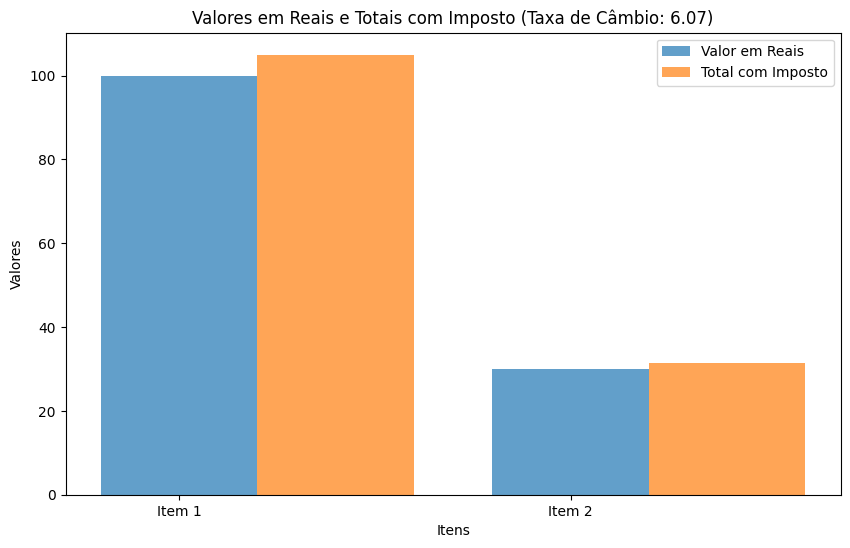

In [2]:
## import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
from collections import deque
import requests

# Função para obter a taxa de câmbio de Real para Dólar usando a API
def conversao_real_para_dolar(valores_reais):
    url = "https://v6.exchangerate-api.com/v6/b4510d7b34906bc3d2735a55/latest/USD"
    
    # Fazendo a requisição GET à API
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        taxa_cambio = data['conversion_rates']['BRL']
        valores_convertidos = valores_reais / taxa_cambio
        return valores_convertidos, taxa_cambio
    else:
        print(f"Erro ao acessar a API: {response.status_code}")
        return None, None

# Função para calcular impostos
def calcular_impostos(valores, taxa_imposto):
    return valores * (taxa_imposto / 100)

# Resolver sistema linear (exemplo: distribuição de despesas)
def resolver_sistema_linear(total_valor):
    x, y = symbols('x y')
    eq1 = Eq(x + y, total_valor)  # Total = x + y
    eq2 = Eq(0.7 * x - 0.3 * y, 0)  # Proporção de 70% para x, 30% para y
    sol = solve((eq1, eq2), (x, y))
    return sol

# Função principal
def calculadora_imposto_com_cambio():
    print("Calculadora de Impostos com Conversão de Real para Dólar")

    # Fila para armazenar valores em Reais
    fila_valores = deque()

    # Entrada de múltiplos valores
    n = int(input("Quantos valores você deseja calcular? "))
    for _ in range(n):
        valor_real = float(input("Digite o valor em Reais: "))
        fila_valores.append(valor_real)
    
    taxa_imposto = float(input("Digite a taxa do imposto (%): "))
    
    # Processar valores na fila
    valores_reais = np.array(list(fila_valores))
    impostos = calcular_impostos(valores_reais, taxa_imposto)
    totais_com_imposto = valores_reais + impostos
    
    # Conversão para Dólares
    valores_dolares, taxa_cambio = conversao_real_para_dolar(valores_reais)
    if valores_dolares is None:
        return

    # Resolver sistema linear (exemplo com o primeiro total)
    sistema_sol = resolver_sistema_linear(totais_com_imposto[0])
    print("\nSolução do sistema linear para distribuição do valor:")
    print(f"x = {sistema_sol[symbols('x')]:.2f}, y = {sistema_sol[symbols('y')]:.2f}")
    
    # Exibir resultados
    print("\nResultados:")
    for i, valor in enumerate(valores_reais):
        print(f"Valor original: R$ {valor:.2f}, Imposto: R$ {impostos[i]:.2f}, Total: R$ {totais_com_imposto[i]:.2f}, Dólar: USD {valores_dolares[i]:.2f}")
    
    # Visualização com Matplotlib
    plt.figure(figsize=(10, 6))
    indices = np.arange(len(valores_reais))
    plt.bar(indices, valores_reais, width=0.4, label='Valor em Reais', alpha=0.7)
    plt.bar(indices + 0.4, totais_com_imposto, width=0.4, label='Total com Imposto', alpha=0.7)
    plt.xticks(indices, [f"Item {i+1}" for i in indices])
    plt.xlabel("Itens")
    plt.ylabel("Valores")
    plt.title(f"Valores em Reais e Totais com Imposto (Taxa de Câmbio: {taxa_cambio:.2f})")
    plt.legend()
    plt.show()

# Chamando a função principal
calculadora_imposto_com_cambio()
